In [1]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

# Numerical integration (of definite integrals)

The topic here is how to calculate integrals such as 

$$ \int_a^b f(x) \, \mathrm{d}x $$

by numerical means. Different methods are available, depending on the situation:
* Is $f(x)$ a known function, that we can evaluate (analytically or numerically)?
* Do we only know the value of $f(x)$ at a given set of points?

## Riemann sum

One way to define a definite integral is by a limit of a Riemann sum (warning: there might be mathematically sloppy notation ahead):

$$ \int_{a}^{b} f(x) \, \mathrm{d}x = \lim_{\Delta x \to 0 \\ N \to \infty} \sum_{i=1}^N \Delta x \, f(x^*_i) \;\;\;\mathrm{where}\;\;\; x_i = x_0 + i \Delta x \;\;\;\mathrm{and}\;\;\; x_{i-1} \leq x^*_i \leq x_i \;\;\;\mathrm{and}\;\;\; x_0 = a \;\;\;\mathrm{and}\;\;\; \Delta x = \frac{b - a}{N}.$$

The point is:
* We want the integral on the interval from $a$ to $b$.
* We subdivide the interval into $N$ subintervals, of equal length $\Delta x$.
* We evaluate the function $f(x)$ at _any_ point $x^*_i$ inside each subinterval.
* The value $\Delta x \, f(x^*_i)$ approximates the area under the function on each subinterval by a rectangle.
* In the limit where $N \to \infty$ and $\Delta x \to 0$ (in such a way that $\Delta x = \frac{b -a}{N}$), the sum is equal to the integral.

If we don't take the limit, but merely let $\Delta x$ be a suitably small number, we have a numerical integration scheme.

## Left and right Riemann sum, and midpoint rule

We can implement different numerical integration schemes by letting $x_i^*$ be respectively the left, the right, and the middle point in each interval. (Spoiler: The midpoint turns out to work better.)

As an example, let's calculate the integral

$$ \int_0^{5\pi/2} \sin(x) \, \mathrm{d} x = 1$$

In [16]:
# Note that in python, it's perfectly ok to send a function
# as an argument to a function, no special declaration needed.
# In general, (almost) anything goes in python. This can be a bit
# dangerous, as it makes it easy to make mistakes.
# With great power comes great responsibility, etc.

def left_riemann(a, b, N, f):
    # The width of each interval
    dx = (b - a) / N
    # Array with the leftmost point of each interval
    X = np.linspace(a, b - dx, N)
    # When f(x) is applied to an array, it returns an array 
    # of equal size, holding the result of applying the function
    # to each element of the original array. We take the sum 
    # of the resulting array, and multiply by dx
    return sum(f(X))*dx

def right_riemann(a, b, N, f):
    # The width of each interval
    dx = (b - a) / N
    # Array with the rightmost point of each interval
    X = np.linspace(a + dx, b, N)
    # Multiply sum by dx and return
    return sum(f(X))*dx

def midpoint_rule(a, b, n, func):
    # The width of each interval
    dx = (b - a) / N
    # Array with the left point of each interval
    X = np.linspace(a + dx/2, b - dx/2, N)
    # Multiply sum by dx and return
    return sum(f(X))*dx    

In [20]:
# Define function, integratoin parameter, and test all three versions

def f(x):
    return np.sin(x)

a = 0
b = 2.5*np.pi
N = 100000

print('Left Riemann:  ', left_riemann(a, b, N, f))
print('Right Riemann: ', right_riemann(a, b, N, f))
print('Midpoint rule: ', midpoint_rule(a, b, N, f))

Left Riemann:   0.9999607295777851
Right Riemann:  1.0000392693941242
Midpoint rule:  1.0000000002570206


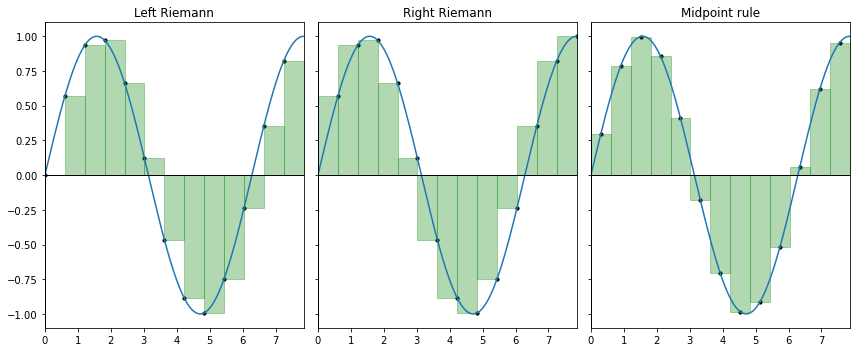

In [23]:
# Make a plot to illustrate the three different methods
fig, axes = plt.subplots(ncols = 3, figsize = (12, 5), sharex = True, sharey = True)

def f(x):
    return np.sin(x)

# Integration parameters
a = 0
b = 2.5*np.pi
N = 13

# stepsize
dx = (b-a)/N
# Offsets from left from the three methods:
offsets = [0, dx, dx/2]

for i, ax in enumerate(axes):
    # Plot the function to be integrated
    X = np.linspace(a, b, 10001)
    ax.plot(X, f(X))
    # Draw axis through origin, for visualisation purposes
    ax.axhline(y=0, color='k', linewidth=1)
    ax.axvline(x=0, color='k', linewidth=1)
    
    # Draw the rectangles used to approximate area under curve
    # Create a vector of the midpoints of each rectangle
    offset = offsets[i]
    Xstar = np.linspace(a + offset, b - dx + offset, N)
    # Draw the points as dots
    ax.scatter(Xstar, f(Xstar), c = 'k', s = 10)
    # For each rectangle, draw the borders using a line plot
    for x in Xstar:
        ax.fill_between([x-offset, x-offset, x+(dx-offset), x+(dx-offset)], [0,f(x), f(x), 0], color = "g", alpha = 0.3)
    ax.set_xlim(a, b)
    
axes[0].set_title('Left Riemann')
axes[1].set_title('Right Riemann')
axes[2].set_title('Midpoint rule')
plt.tight_layout()

## Trapezoidal rule

In the trapezoidal rule, we approximate the area under the curve on each subinterval by a trapezoid instead of a rectangle (see illustrating plot below).

$$ \int_{x_0}^{x_N} f(x) \, \mathrm{d} x \approx \sum_{i=1}^N \frac{f(x_{i-1}) + f(x_i)}{2} \Delta x .$$

In [24]:
def trapezoidal_rule(a, b, N, f):
    dx = (b - a) / N
    X = np.linspace(a + dx, b - dx, N-1)
    # Utilising the fact that all the interior points
    # are included twice, to write this on a compact form
    return (f(a)/2 + sum(f(X)) + f(b)/2)*dx

In [26]:
# Define function, integratoin parameter, and test all four schemes

def f(x):
    return np.sin(x)

a = 0
b = 2.5*np.pi
N = 10000

print('Left Riemann:    ', left_riemann(a, b, N, f))
print('Right Riemann:   ', right_riemann(a, b, N, f))
print('Midpoint rule:   ', midpoint_rule(a, b, N, f))
print('Trapezoidal rule:', trapezoidal_rule(a, b, N, f))

Left Riemann:     0.9996072495141111
Right Riemann:    1.0003926476775091
Midpoint rule:    1.000000025702095
Trapezoidal rule: 0.9999999485958103


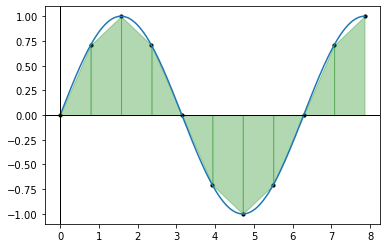

In [7]:
# Plot the function to be integrated
X = np.linspace(a, b, 10001)
plt.plot(X, f(X))

# Draw axis through origin, for visualisation purposes
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

# Draw the trapezoids
N  = 10
# Each has width step
dx = (b - a)/N
# Create a vector of the abcissas, using 
# N+1 points for a closed rule
X  = np.linspace(a, b, N+1)
# Draw the abcissas as circles
plt.scatter(X, f(X), c = 'k', s = 10)
# For each trapezoid, draw the borders using a line plot
# stopping at the next-to-last
for x in X[:-1]:
    plt.fill_between([x, x, x+dx, x+dx], [0, f(x), f(x+dx), 0], color = "g", alpha = 0.3)

## Simpson's rule(s)

Simpsons's rules are based on approximating the function with a Lagrange interpolating polynomial (see notebook no. 7) on each interval. The trapezoid rule is the simplest version of this approach, approximating the true function by a linear interpolation on each interval. Using higher polynomials requires more points on each interval:

* Let's say we have know the value of the true function in 3 equidistant points, $x_i$, $x_{i+1}$ and $x_{i+2}$.
* Then there is exactly one quadratic polynomial that goes through all three points.
* We can find it using the expression for Lagrange interpolating polynomials (see notebook no. 7).
* Furthermore, the area under that quadratic polynomial (that is, the definite integral from $x_i$ to $x_{i+2}$ can be calculated analytically (it's just the definite integral of a known quadratic function).
* We can then use the area under the polynomial to approximate the area under the true function.

It is of course possible to use more than three points, and corresponding polynomials of higher degree. However, just as we saw for high-order Lagrange polynomials, spurious oscillations can cause large errors.


### Simpson's first rule (also known as Simpson's 1/3 rule, or just Simpson's rule)

For a single interval with three points, $x_i$, $x_{i+1}$ and $x_{i+2}$, the rule says

$$ \int_{x_i}^{x_{i+2}} f(x) \, \mathrm{d} x \approx \frac{\Delta x}{3} \big[ f(x_i) + 4 f(x_{i+1}) + f(x_{i+2}) \big]. $$

In practice, one will usually divide an interval into more than three points, and use Simpson's rule on three and thre points. This is called the composite Simpson's rule. When you write it out, you get alternating prefactors 4 and 2, exept at the end points:

$$ \int_{x_0}^{x_{N}} f(x) \, \mathrm{d} x \approx \frac{\Delta x}{3} \big[ f(x_0) + 4 f(x_{1}) + 2 f(x_{2}) + 4 f(x_3) + \ldots + 4 f(x_{N-3}) + 2 f(x_{N-2}) + 4 f(x_{N-1}) + f(x_N) \big]. $$

Note that this requires an even number of intervals. If you are given a set of values with an odd number of intervals, you can use the trapezoid rule on the first or last interval, and Simpson's rule on the rest.

In [27]:
def simpsons_rule(a, b, N, f):
    # N must be even for Simpson's rule
    assert N%2 == 0
    dx = (b - a) / N
    # All abcissas, including endpoints
    # (using N+1 points, for N intervals)
    X = np.linspace(a, b, N+1)
    # Using numpy array slicing to index
    #   every other point starting from the second point: X[1:-1:2]
    #   every other point starting from the third point: X[2:-1:2]
    # Endpoints handled separately
    return (dx/3)*(f(X[0]) + 4*np.sum(f(X[1:-1:2])) + 2*np.sum(f(X[2:-1:2])) + f(X[-1]))

In [30]:
# Define function, integratoin parameter, and test all five schemes

def f(x):
    return np.sin(x)

a = 0
b = 2.5*np.pi
N = 1000

print('Left Riemann:    ', left_riemann(a, b, N, f))
print('Right Riemann:   ', right_riemann(a, b, N, f))
print('Midpoint rule:   ', midpoint_rule(a, b, N, f))
print('Trapezoidal rule:', trapezoidal_rule(a, b, N, f))
print("Simpson's rule:  ", simpsons_rule(a, b, N, f))

Left Riemann:     0.9960678687587685
Right Riemann:    1.0039218503927436
Midpoint rule:    1.000002570214102
Trapezoidal rule: 0.9999948595757563
Simpson's rule:   1.0000000000211398


## Test convergence numerically

By plotting the error as a function of the stepsize $\Delta x$, we can test the rate of convergene.

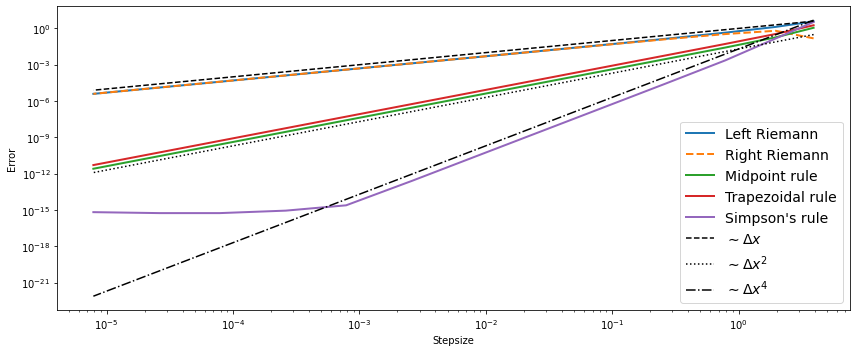

In [31]:
# Function to integrate
def f(x):
    return np.sin(x)

# Integration interval
a = 0
b = 2.5*np.pi

# Exact solution
exact = 1

# Note: Choosing stepsize implicitly by choosing N,
# such that we divide [a, b] into integer number of intervals.
# Using 2 and 4 as the first ones since Simpson's rule
# requires even number of intervals.
N_intervals = np.array([2, 4, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000])
stepsizes = (b-a)/N_intervals

# Arrays to store errors
error_left      = np.zeros(len(N_intervals))
error_right     = np.zeros(len(N_intervals))
error_midpoint  = np.zeros(len(N_intervals))
error_trapezoidal = np.zeros(len(N_intervals))
error_simpson   = np.zeros(len(N_intervals))

for i, N in enumerate(N_intervals):
    error_left[i]      = np.abs(exact - left_riemann( a, b, N, f))
    error_right[i]     = np.abs(exact - right_riemann(a, b, N, f))
    error_midpoint[i]  = np.abs(exact - midpoint_rule(a, b, N, f))
    error_trapezoidal[i] = np.abs(exact - trapezoidal_rule(a, b, N, f))
    error_simpson[i]   = np.abs(exact - simpsons_rule(a, b, N, f))


fig = plt.figure(figsize = (12, 5))

# Plot error as function of stepsize
plt.plot(stepsizes, error_left, lw = 2, label = 'Left Riemann')
plt.plot(stepsizes, error_right, '--', lw = 2, label = 'Right Riemann')
plt.plot(stepsizes, error_midpoint, lw = 2, label = 'Midpoint rule')
plt.plot(stepsizes, error_trapezoidal, lw = 2, label = 'Trapezoidal rule')
plt.plot(stepsizes, error_simpson, lw = 2, label = "Simpson's rule")

# Plot trendlines for comparison
plt.plot(stepsizes, stepsizes, '--', c = 'k', label = '$\sim \Delta x$')
plt.plot(stepsizes, 0.02*stepsizes**2, ':', c = 'k', label = '$\sim \Delta x^2$')
plt.plot(stepsizes, 0.02*stepsizes**4, '-.', c = 'k', label = '$\sim \Delta x^4$')

# Legend, labels, logscale, etc.
plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Stepsize')
plt.ylabel('Error')
plt.tight_layout()

## Some points to be aware of

It's always useful to do a sanity check and think about the results, and use any information you have about the function (see more information in the slides for the course). Watch out for:
* Oscillatory integrands
* Singularities
* Discontinuities
* etc

## Some useful functions from SciPy

SciPy has a long list of different functions for evaluating integrals, including Simpson and trapezoidal, and several variants of Gaussian quadratures (see more information in slides), Romberg, etc. See https://docs.scipy.org/doc/scipy/reference/integrate.html

Some of these work for a function ```f(x)``` that can be evaluated anywhere, others work if you only have a list of samples.

Experimentation is encouraged, and it is generally a good idea to try to at least understand the basics of how a function works if you rely on the results.

In [11]:
# Examples when you have a function you can evaluate anywhere
from scipy.integrate import quad, romberg, quadrature

def f(x):
    return np.sin(x)

a = 0
b = 2.5*np.pi

# These take an optional keyword argument specifying the error tolerance
# Two of the methods below return both the result and an estimate of the error
# See documentation for each method for details
print('quad       (QUADPACK): ', quad(f, a, b, epsrel = 1e-12))
print('quadrature (Gaussian): ', quadrature(f, a, b, rtol = 1e-12))
print('romberg    (Romberg):  ', romberg(f, a, b, rtol = 1e-12))

quad       (QUADPACK):  (0.9999999999999996, 5.583095022659779e-14)
quadrature (Gaussian):  (1.0000000000021252, 2.079981742397763e-10)
romberg    (Romberg):   0.9999999999999967


In [32]:
# Examples when you have a list of function values in points

# Note: These have changed names in the latest version of SciPy
# (and I'm not using the very latest version)
from scipy.integrate import trapz, simps, romb
# If you get import errors, try this instead
#from scipy.integrate import trapezoid, simpson, romb


def f(x):
    return np.sin(x)

a = 0
b = 2.5*np.pi

# Note: Romberg requires that N be on the form 2**k + 1
N  = 2**8 + 1
X  = np.linspace(a, b, N)
dx = (X[1]-X[0])
Y  = f(X)

# Note that they differ in how they take the x values
# See documentation for each method for details
print('trapz:', trapz(Y, x = X))
print('simps:', simps(Y, x = X))
print('romb: ', romb(Y, dx = dx))

trapz: 0.9999215622009263
simps: 1.0000000049223874
romb:  0.9999999999999996


## Monte Carlo integration

A definite integral is by definition equal to the average value of the function on the interval, times the length of the interval:

$$ \int_a^b f(x) \, \mathrm{d}x  = (b-a) \langle f(x) \rangle \;\;\; \mathrm{for} \;\;\; x \in [a, b].$$

Another way to approximate this value is to draw uniform random numbers on the interval $[a, b]$, and calculate the average function value in those points. This is the essence of Monte Carlo integration:

$$ \int_a^b f(x) \, \mathrm{d}x \approx \sum_{i=1}^N \frac{f(x_i)}{N} \;\;\; \mathrm{for} \;\;\; x \sim \mathcal{U}(a, b).$$

Disadvantages of Monte Carlo integration:
* Estimate converges as $\frac{1}{\sqrt{N}}$.

Advantages of Monte Carlo integration:
* Estimate converges as $\frac{1}{\sqrt{N}}$.

The main use of Monte Carlo integration is for calculating high-dimensional integrals. The problem with many dimensions is that the number of points increase very quickly for the regular methods. Say you have 10 dimensions, and you want to double the number of points in each dimension, then you suddenly have $2^{10} = 1024$ times as many points. For Monte Carlo integration, the convergence is $1/\sqrt{N}$ regardless (but the prefactor might be large, though).

For practical applications, you might want to implement a more advanced version, for example by subdividing the integration domain, and calculating the integral of each domain individually, with more samples in those intervals where there is more variation in the function value. See for example https://en.wikipedia.org/wiki/Monte_Carlo_integration#Recursive_stratified_sampling

In [13]:
def monte_carlo(a, b, N, f):
    # The vanilla Monte Carlo integration
    # is very simple to implement:
    X = np.random.uniform(a, b, N)
    return (b-a)*np.mean(f(X))

In [42]:
# Define function, integratoin parameter, and test all five schemes

def f(x):
    return np.sin(x)

a = 0
b = 2.5*np.pi
N = 100000

print('Left Riemann:    ', left_riemann(a, b, N, f))
print('Right Riemann:   ', right_riemann(a, b, N, f))
print('Midpoint rule:   ', midpoint_rule(a, b, N, f))
print('Trapezoidal rule:', trapezoidal_rule(a, b, N, f))
print("Simpson's rule:  ", simpsons_rule(a, b, N, f))
print('Monte Carlo:     ', monte_carlo(a, b, N, f))

Left Riemann:     0.9999607295777851
Right Riemann:    1.0000392693941242
Midpoint rule:    1.0000000002570206
Trapezoidal rule: 0.9999999994859561
Simpson's rule:   0.9999999999999994
Monte Carlo:      1.0143082703661892


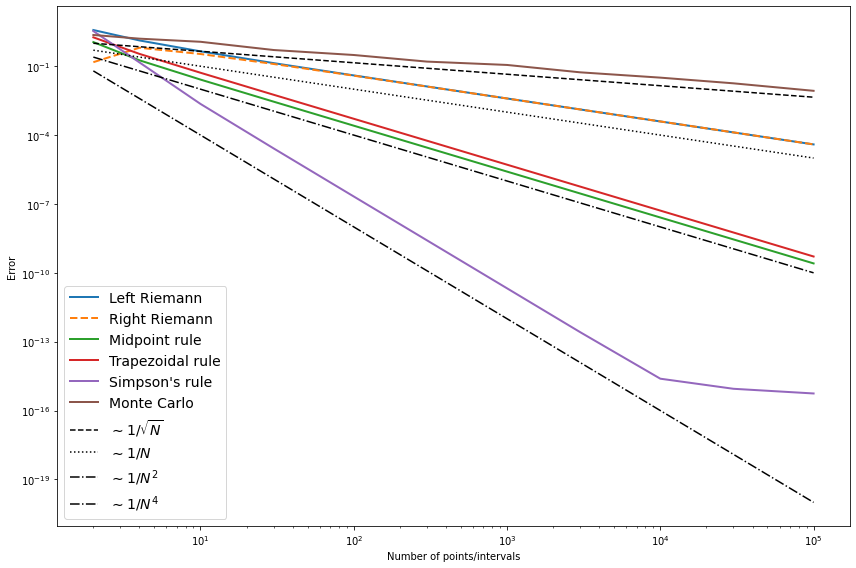

In [44]:
# Function to integrate
def f(x):
    return np.sin(x)

# Integration interval
a = 0
b = 2.5*np.pi

# Exact solution
exact = 1

# Note: Choosing stepsize implicitly by choosing N,
# such that we divide [a, b] into integer number of intervals.
# Using 2 and 4 as the first ones since Simpson's rule
# requires even number of intervals.
N_intervals = np.array([2, 4, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000])
stepsizes = (b-a)/N_intervals

# Arrays to store errors
error_left      = np.zeros(len(N_intervals))
error_right     = np.zeros(len(N_intervals))
error_midpoint  = np.zeros(len(N_intervals))
error_trapezoidal = np.zeros(len(N_intervals))
error_simpson   = np.zeros(len(N_intervals))
error_montecarlo = np.zeros(len(N_intervals))

for i, N in enumerate(N_intervals):
    error_left[i]      = np.abs(exact - left_riemann( a, b, N, f))
    error_right[i]     = np.abs(exact - right_riemann(a, b, N, f))
    error_midpoint[i]  = np.abs(exact - midpoint_rule(a, b, N, f))
    error_trapezoidal[i] = np.abs(exact - trapezoidal_rule(a, b, N, f))
    error_simpson[i]   = np.abs(exact - simpsons_rule(a, b, N, f))
    # An extra loop for Monte Carlo:
    # Calculate the integral M times, and take the standard deviation
    M = 100
    errors = np.zeros(M)
    for n in range(M):
        errors[n] = np.abs(exact - monte_carlo(a, b, N, f))
    error_montecarlo[i] = np.std(errors)


fig = plt.figure(figsize = (12, 8))

# Plot error as function of stepsize
plt.plot(N_intervals, error_left, lw = 2, label = 'Left Riemann')
plt.plot(N_intervals, error_right, '--', lw = 2, label = 'Right Riemann')
plt.plot(N_intervals, error_midpoint, lw = 2, label = 'Midpoint rule')
plt.plot(N_intervals, error_trapezoidal, lw = 2, label = 'Trapezoidal rule')
plt.plot(N_intervals, error_simpson, lw = 2, label = "Simpson's rule")
plt.plot(N_intervals, error_montecarlo, lw = 2, label = "Monte Carlo")

# Plot trendlines for comparison
plt.plot(N_intervals, (0.5*N_intervals)**(-0.5), '--', c = 'k', label = '$\sim 1/\sqrt{N}$')
plt.plot(N_intervals, (1.*N_intervals)**(-1), ':', c = 'k', label = '$\sim 1/N$')
plt.plot(N_intervals, (1.*N_intervals)**(-2), '-.', c = 'k', label = '$\sim 1/N^2$')
plt.plot(N_intervals, (1.*N_intervals)**(-4), '-.', c = 'k', label = '$\sim 1/N^4$')

# Legend, labels, logscale, etc.
plt.legend(fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of points/intervals')
plt.ylabel('Error')
plt.tight_layout()